In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
df.head()

,CPU Total,CPU Package Temperature,Memory,Used Memory,Temperature,Used Space
0,3.528023,40,48.994663,1.918564,35,92.11886
1,5.060095,40,48.971184,1.917644,35,92.11886
2,10.937500,40,49.110200,1.923088,35,92.11886
3,5.078125,40,49.125004,1.923668,35,92.11886
4,2.343750,40,49.137670,1.924164,35,92.11886


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CPU Total                2190 non-null   float64
 1   CPU Package Temperature  2190 non-null   int64  
 2   Memory                   2190 non-null   float64
 3   Used Memory              2190 non-null   float64
 4   Temperature              2190 non-null   int64  
 5   Used Space               2190 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 102.8 KB


In [5]:
df.keys()

Index(['CPU Total', 'CPU Package Temperature', 'Memory', 'Used Memory',
       'Temperature', 'Used Space'],
      dtype='object')

In [6]:
df.corr()

,CPU Total,CPU Package Temperature,Memory,Used Memory,Temperature,Used Space
CPU Total,1.000000,0.810565,0.707491,0.707491,0.419328,0.462308
CPU Package Temperature,0.810565,1.000000,0.752538,0.752538,0.731213,0.642658
Memory,0.707491,0.752538,1.000000,1.000000,0.443466,0.502389
Used Memory,0.707491,0.752538,1.000000,1.000000,0.443466,0.502389
Temperature,0.419328,0.731213,0.443466,0.443466,1.000000,0.826656
Used Space,0.462308,0.642658,0.502389,0.502389,0.826656,1.000000


In [7]:
df.corr()['CPU Package Temperature'].sort_values()

Used Space                 0.642658
Temperature                0.731213
Used Memory                0.752538
Memory                     0.752538
CPU Total                  0.810565
CPU Package Temperature    1.000000
Name: CPU Package Temperature, dtype: float64

<Figure size 864x432 with 0 Axes>

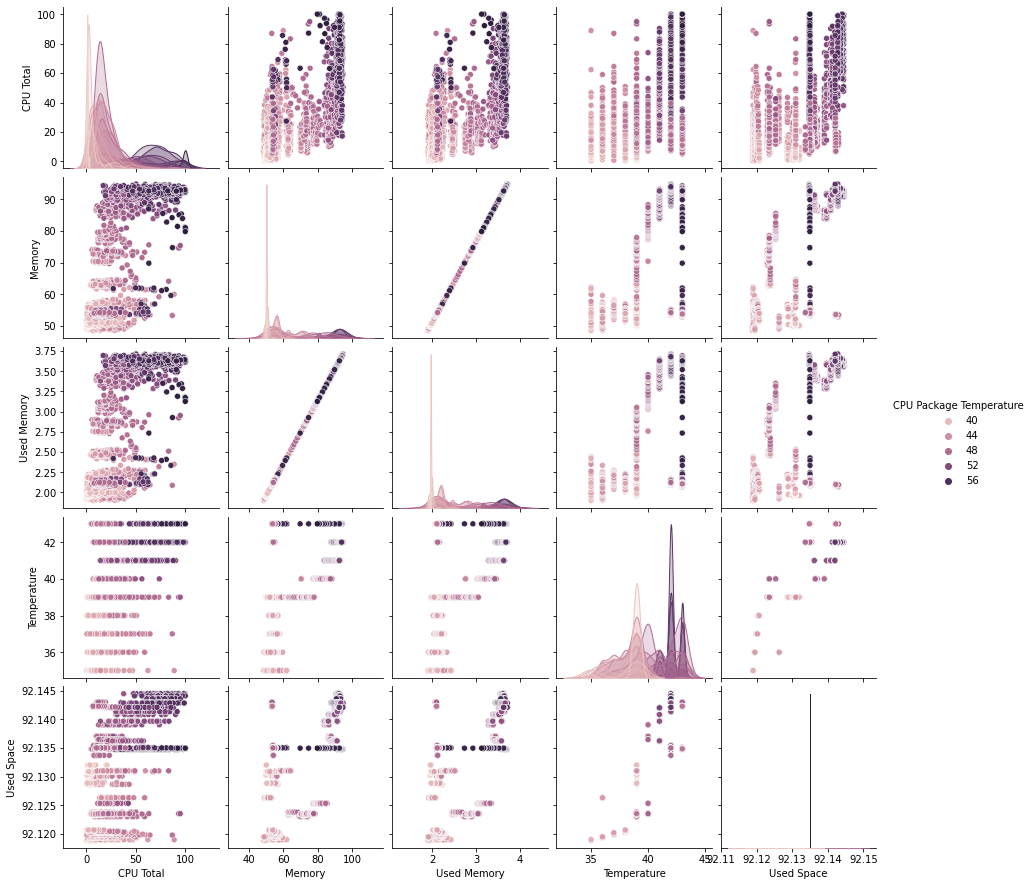

In [8]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='CPU Package Temperature')

In [9]:
# LINEAR REGRESSION

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
m1=LinearRegression()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X=df.drop(['CPU Package Temperature'],axis=1)
y=df['CPU Package Temperature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
m1.fit(X_train,y_train)

LinearRegression()

In [15]:
pred1=m1.predict(X_test)

/Users/satishkumar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='CPU Package Temperature'>

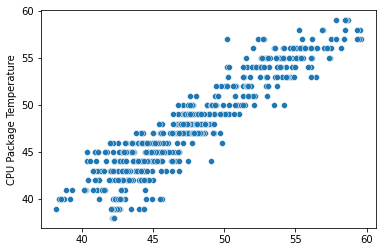

In [16]:
sns.scatterplot(pred1,y_test)

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
print(mean_squared_error(y_test,pred1))

3.300821722544274


In [19]:
# SUPPORT VECTOR REGRESSOR

In [20]:
from sklearn.svm import SVR

In [21]:
reg=SVR()

In [22]:
reg.fit(X_train,y_train)

SVR()

In [23]:
pred2=reg.predict(X_test)

/Users/satishkumar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='CPU Package Temperature'>

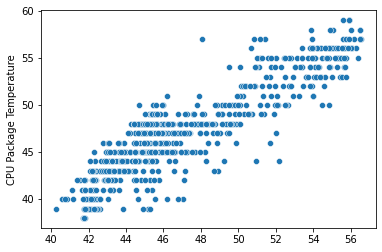

In [24]:
sns.scatterplot(pred2,y_test)

In [25]:
print(mean_squared_error(y_test,pred2))

4.8665320399171765


In [26]:
# RANDOM FOREST

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
reg1=RandomForestRegressor(n_estimators=10)

In [29]:
reg1.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [31]:
pred3=reg1.predict(X_test)

/Users/satishkumar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CPU Package Temperature'>

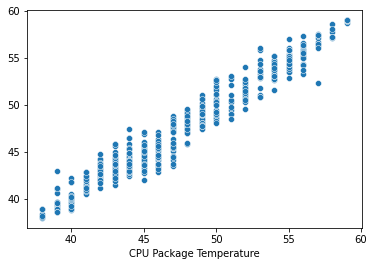

In [32]:
sns.scatterplot(y_test,pred3)

In [33]:
print(mean_squared_error(y_test,pred3))

1.1661035007610348


In [ ]:
# FROM THE ABOVE PREDICTION WE CAN SEE LOWEST MSE IS GIVEN BY RANDOM FOREST. SO IT IS BEST AMONG 3